# Neural Networks 
***Problem Statement :***
- PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [2]:
# Importing usefull libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Ignore anoying warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset
data = pd.read_csv("forestfires.csv")

# Showing first 5 rows from given dataset
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
# Dimensions of dataset
data.shape

(517, 31)

In [5]:
# Summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
# Looking for null values
data.isna().any().any()

False

In [6]:
# Generate descriptive statistics.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


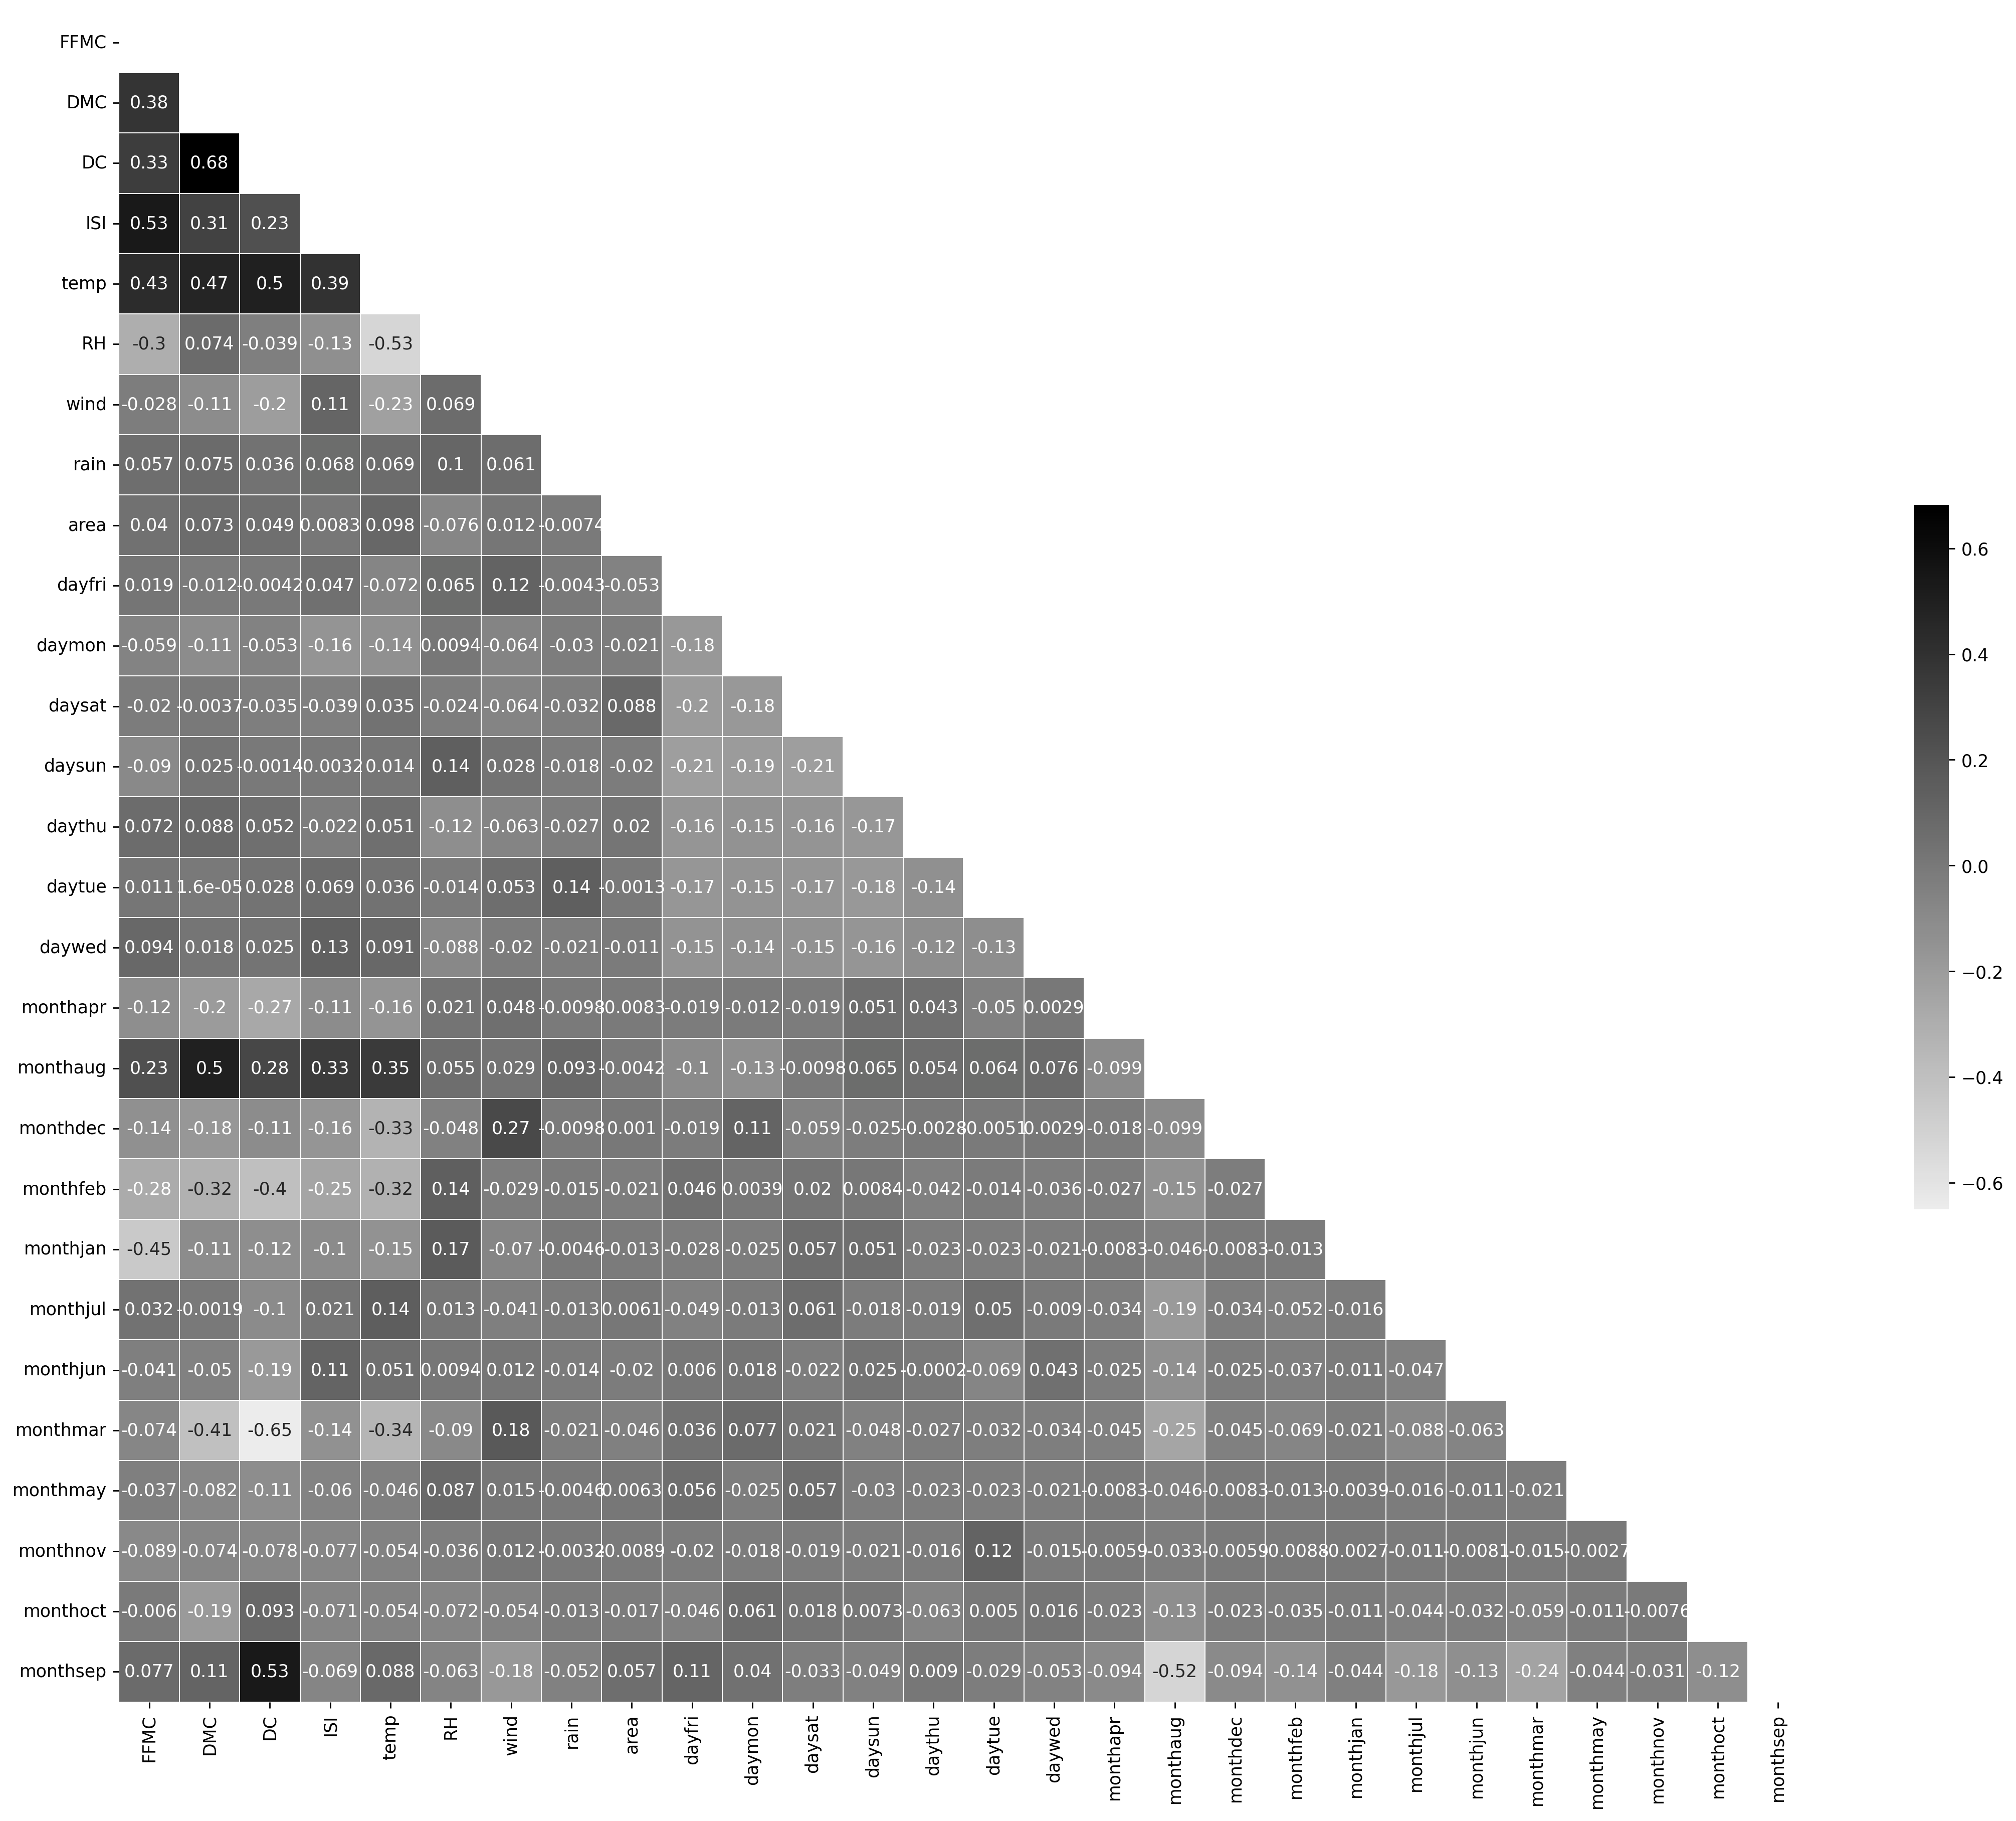

In [7]:
# Correlation matrix
corr = data.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
f, ax = plt.subplots(figsize=(18,15),dpi=250)
cmap = sns.light_palette('black', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True,
            annot=True, linewidths=0.5, cbar_kws={'shrink':0.4})
plt.tight_layout()
plt.show()

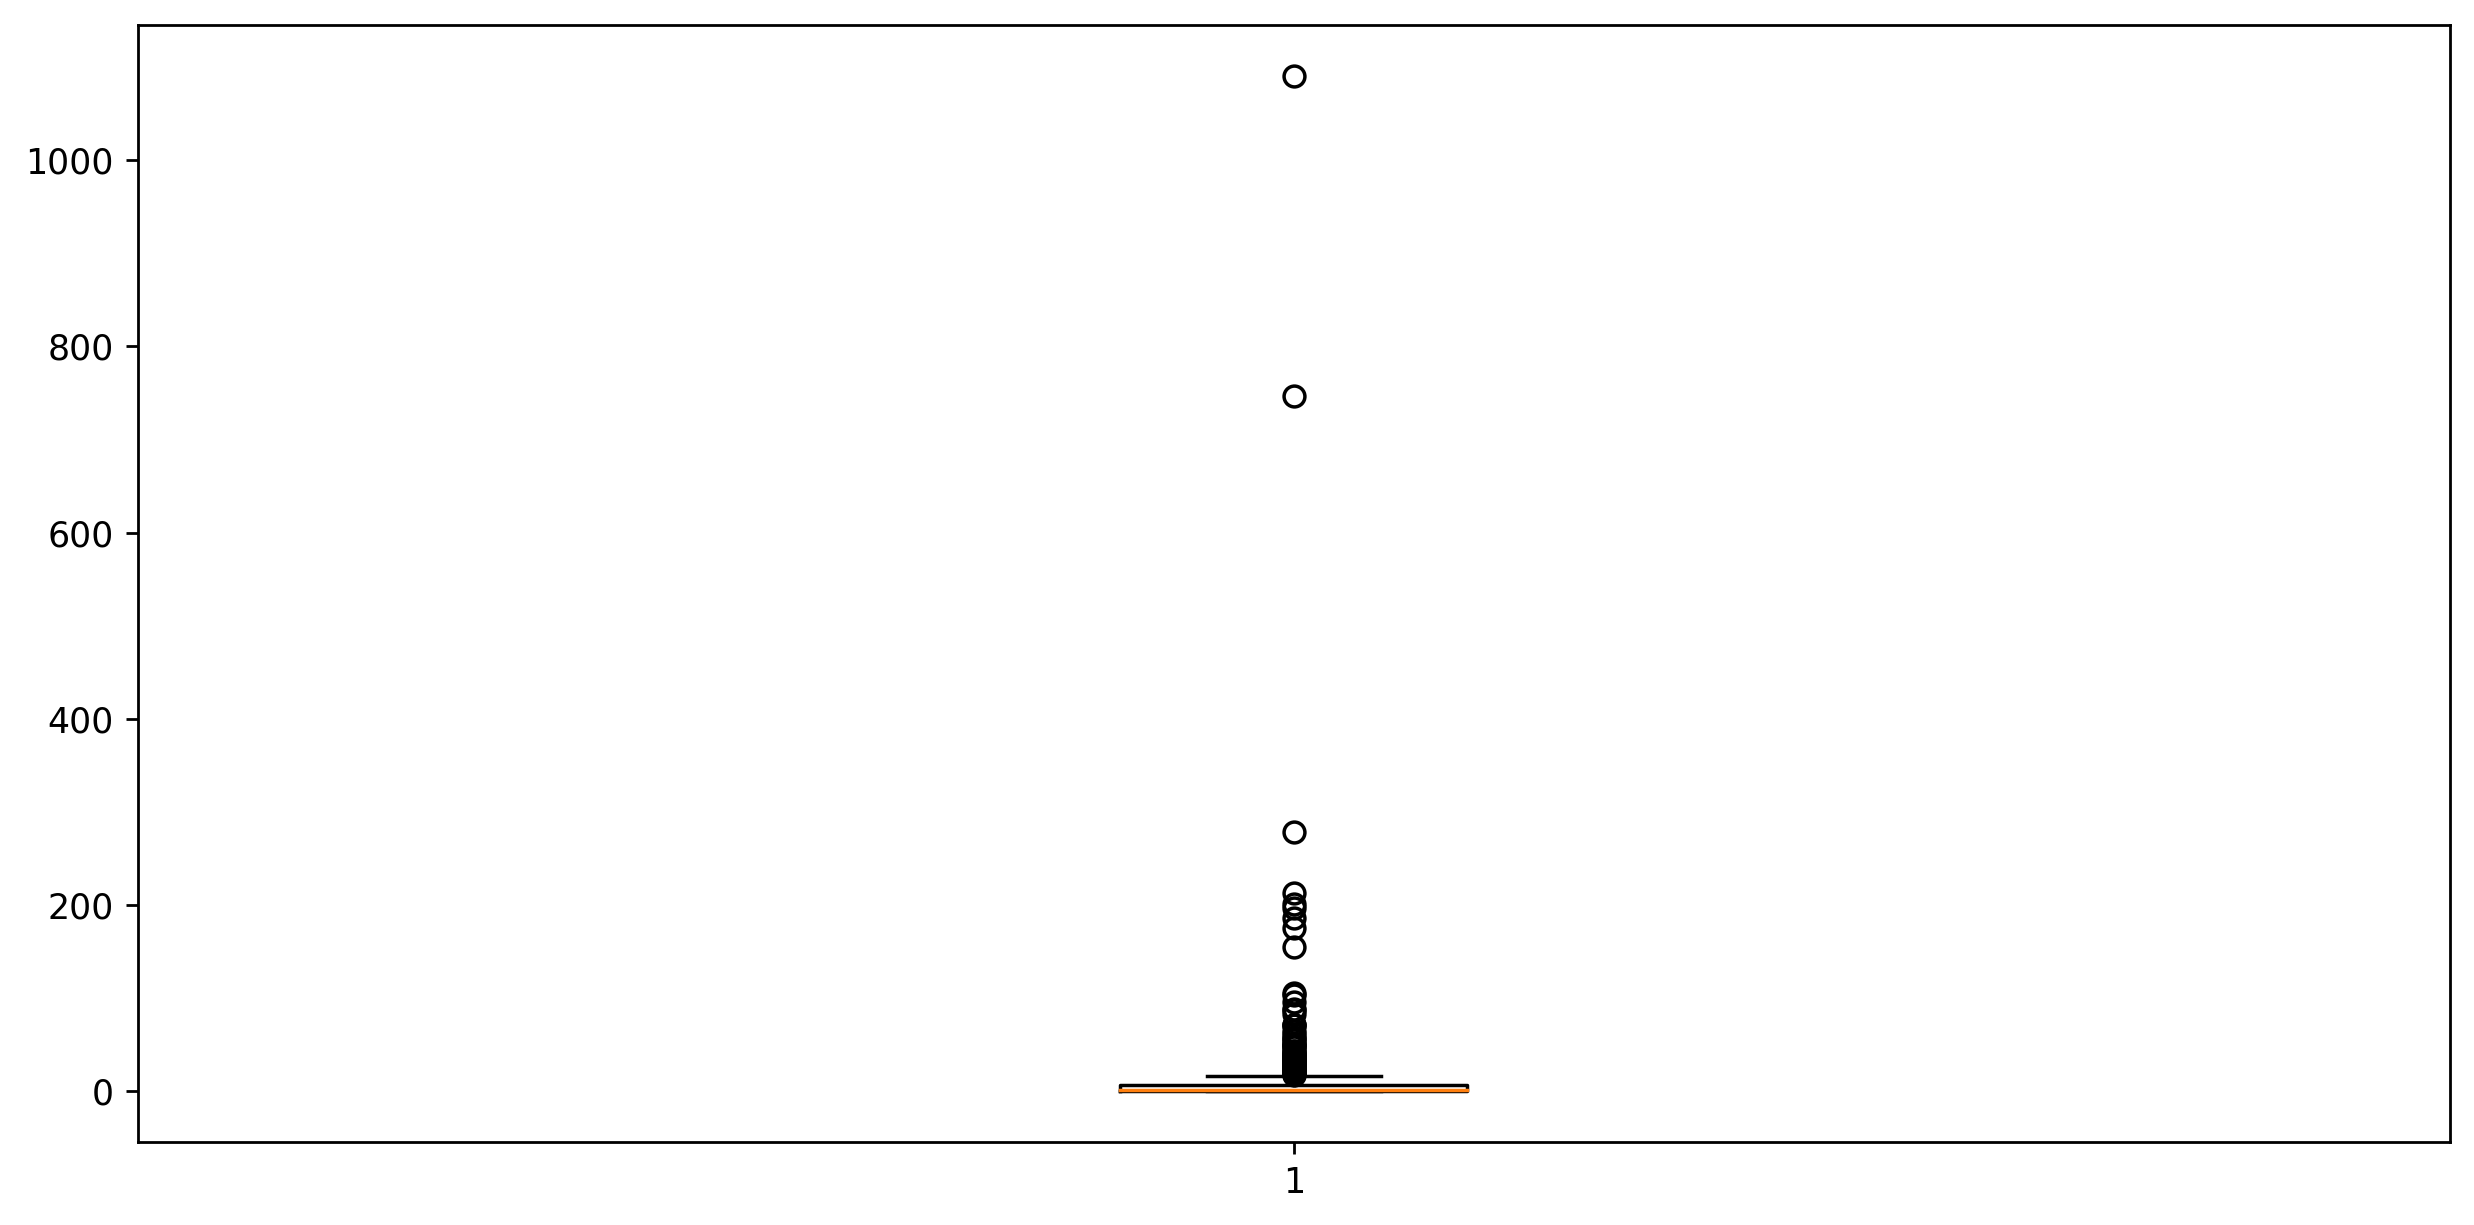

In [8]:
# To reinforce our insights about the "area" column symmetry and their outliers, we can plot some boxplots
plt.rcParams['figure.dpi']=250
plt.rcParams['figure.figsize']=(10,5)
plt.boxplot(data['area'])
plt.tight_layout()
plt.show()

In [9]:
# Checking skewness of given dataset
data.skew()

FFMC        -6.575606
DMC          0.547498
DC          -1.100445
ISI          2.536325
temp        -0.331172
RH           0.862904
wind         0.571001
rain        19.816344
area        12.846934
dayfri       1.816105
daymon       2.043956
daysat       1.835290
daysun       1.637920
daythu       2.375268
daytue       2.291255
daywed       2.594172
monthapr     7.401340
monthaug     0.603696
monthdec     7.401340
monthfeb     4.798308
monthjan    16.031038
monthjul     3.646828
monthjun     5.254127
monthmar     2.594172
monthmay    16.031038
monthnov    22.737634
monthoct     5.628522
monthsep     0.712255
dtype: float64

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


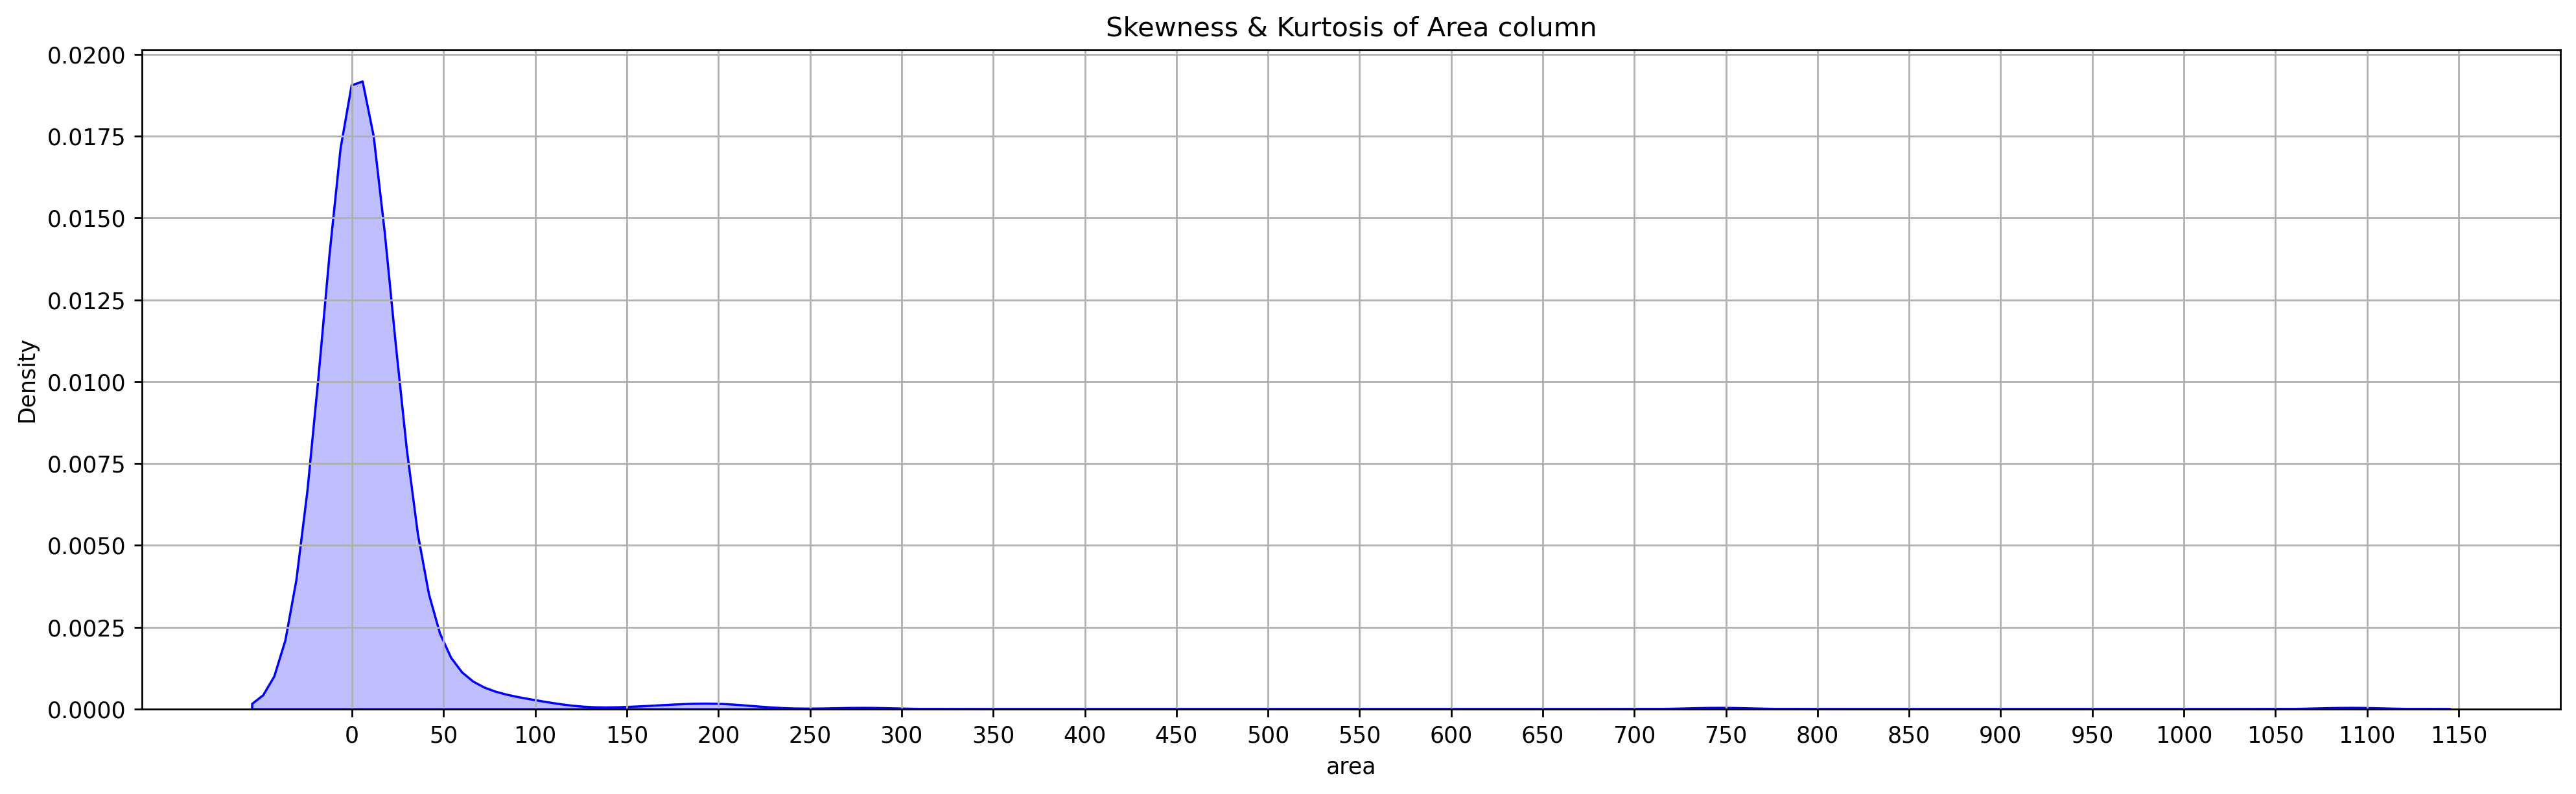

In [10]:
# Visualizing the skewness of "area" column
plt.figure(figsize=(16,5),dpi=250)
print("Skew: {}".format(data['area'].skew()))
print("Kurtosis: {}".format(data['area'].kurtosis()))
ax = sns.kdeplot(data['area'],shade=True,color='blue')
plt.xticks([i for i in range(0,1200,50)])
plt.title("Skewness & Kurtosis of Area column")
plt.grid()
plt.tight_layout()
plt.show()

**Label Encoding :**
- Converting categorical columns into numerical columns.

In [4]:
le = LabelEncoder()

# Selecting only those columns which are ctegoricals in nature
cat_cols = data.select_dtypes(include=[object]).columns

# Converting those selected columns into numerical columns
data[cat_cols] = data[cat_cols].apply(lambda col : le.fit_transform(col))

# Showing encoded dataset
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Unique value counts in "size_category" column
data.size_category.value_counts()

1    378
0    139
Name: size_category, dtype: int64

# Model Building :

In [6]:
# Creating independent (x) & dependent (y) variables
x = data.drop('size_category',axis=1)
y = data['size_category']

In [7]:
# Split the data into training and test sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [8]:
# Normalize the training and test data using StandardScaler
scaler = StandardScaler()
train_data = scaler.fit_transform(xtrain)
test_data = scaler.fit_transform(xtest)

In [9]:
# Convert the data and labels to numpy arrays
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xtest = np.array(xtest)
ytest = np.array(ytest)

In [10]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [11]:
# Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ["accuracy"])

In [12]:
# Train the model
history = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 1s 16ms/step - loss: 41.5465 - accuracy: 0.2567 - val_loss: 1.4580 - val_accuracy: 0.7308
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 5.7669 - accuracy: 0.7070 - val_loss: 4.6935 - val_accuracy: 0.7692
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 2.8890 - accuracy: 0.7119 - val_loss: 2.1933 - val_accuracy: 0.3750
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 1.2983 - accuracy: 0.6150 - val_loss: 0.7400 - val_accuracy: 0.7404
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5956 - accuracy: 0.7361 - val_loss: 0.5286 - val_accuracy: 0.7596
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4987 - accuracy: 0.7651 - val_loss: 0.4722 - val_accuracy: 0.8173
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4574 - accuracy: 0.7942 - val_loss: 0.4517 - val_accuracy: 0.7885
Epoch 8/100

Epoch 59/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0858 - accuracy: 0.9831 - val_loss: 0.1036 - val_accuracy: 0.9615
Epoch 60/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0876 - accuracy: 0.9758 - val_loss: 0.1030 - val_accuracy: 0.9615
Epoch 61/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9806 - val_loss: 0.1339 - val_accuracy: 0.9327
Epoch 62/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.9685 - val_loss: 0.0948 - val_accuracy: 0.9423
Epoch 63/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9806 - val_loss: 0.1048 - val_accuracy: 0.9808
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0836 - accuracy: 0.9709 - val_loss: 0.1198 - val_accuracy: 0.9423
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0770 - accuracy: 0.9782 - val_loss: 0.0992 - val_accuracy: 0.9519
Epoch 

**Evaluating the model :**

In [13]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(xtest, ytest, verbose=2)
print("Test accuracy:", test_acc)

4/4 - 0s - loss: 0.0613 - accuracy: 0.9808 - 24ms/epoch - 6ms/step
Test accuracy: 0.9807692170143127


In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

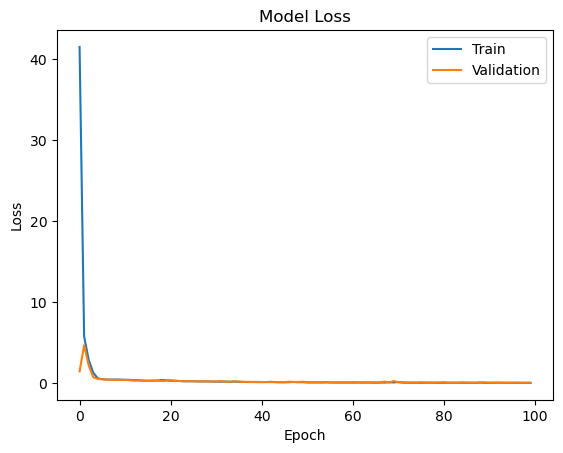

In [15]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [16]:
# Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 4,195
Trainable params: 4,195
Non-trainable params: 0
_________________________________________________________________


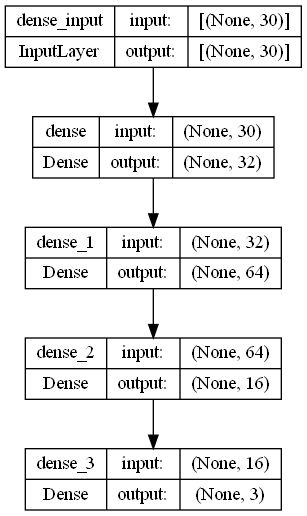

In [17]:
# Showing model architecture
plot_model(model, to_file="model.png", show_shapes=True)
Image(filename="model.png")

In [25]:
# from PIL import Image
# im = Image.open("model.png")
# im.show()

# Hyperparameter Tunning :
**Early Stopping :**

In [18]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [19]:
# Model building
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ["accuracy"])

# Train the model
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),callbacks=[early],epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 2.6329 - accuracy: 0.6102 - val_loss: 0.7509 - val_accuracy: 0.7885
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6226 - accuracy: 0.7772 - val_loss: 0.4574 - val_accuracy: 0.8462
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4892 - accuracy: 0.8136 - val_loss: 0.3073 - val_accuracy: 0.8846
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3114 - accuracy: 0.8789 - val_loss: 0.3253 - val_accuracy: 0.9038
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3059 - accuracy: 0.8765 - val_loss: 0.2293 - val_accuracy: 0.9231
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2479 - accuracy: 0.8959 - val_loss: 0.2525 - val_accuracy: 0.9423
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2425 - accuracy: 0.9128 - val_loss: 0.2356 - val_accuracy: 0.9135
Epoch 8/100


Epoch 59/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0433 - accuracy: 0.9831 - val_loss: 0.0447 - val_accuracy: 0.9808
Epoch 60/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0343 - accuracy: 0.9903 - val_loss: 0.0462 - val_accuracy: 0.9808
Epoch 61/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0837 - accuracy: 0.9685 - val_loss: 0.0501 - val_accuracy: 0.9808
Epoch 62/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1511 - accuracy: 0.9588 - val_loss: 0.0575 - val_accuracy: 0.9712
Epoch 63/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0384 - accuracy: 0.9903 - val_loss: 0.0487 - val_accuracy: 0.9712
Epoch 64/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0618 - accuracy: 0.9806 - val_loss: 0.1024 - val_accuracy: 0.9712
Epoch 65/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0665 - accuracy: 0.9709 - val_loss: 0.2721 - val_accuracy: 0.9231
Epoch 

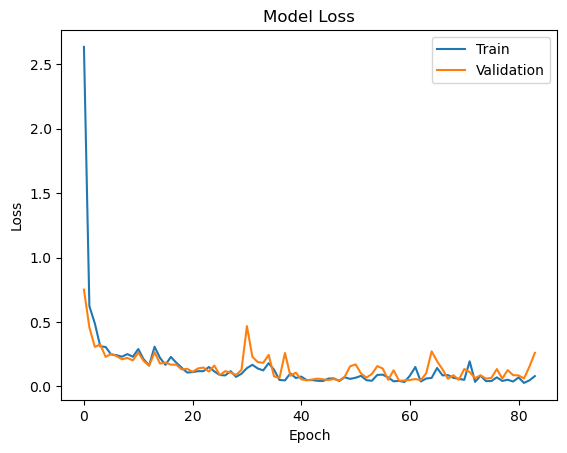

In [21]:
early_loss = pd.DataFrame(model.history.history)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<AxesSubplot: >

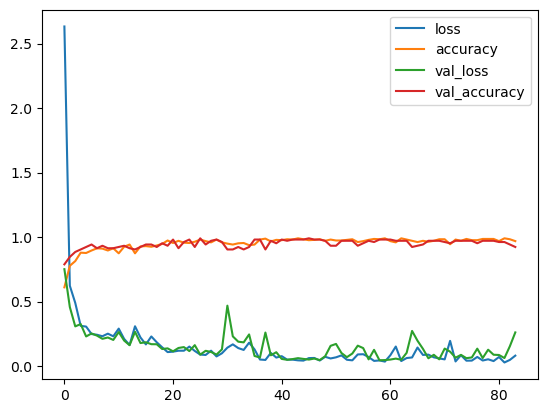

In [29]:
early_loss.plot()

**Drop Out Layer :**

In [22]:
# Model building
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dropout(0.2), # add dropout with rate 0.2
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2), # add dropout with rate 0.2
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dropout(0.2), # add dropout with rate 0.2
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ["accuracy"])

# Train the model
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 12ms/step - loss: 17.4521 - accuracy: 0.5133 - val_loss: 5.1828 - val_accuracy: 0.7692
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 9.8897 - accuracy: 0.5860 - val_loss: 1.8339 - val_accuracy: 0.7692
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 5.6004 - accuracy: 0.5787 - val_loss: 0.9694 - val_accuracy: 0.7692
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 4.2680 - accuracy: 0.5738 - val_loss: 0.7501 - val_accuracy: 0.7692
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 2.8304 - accuracy: 0.5327 - val_loss: 0.7996 - val_accuracy: 0.7692
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 1.9164 - accuracy: 0.5763 - val_loss: 0.6908 - val_accuracy: 0.7500
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 1.5748 - accuracy: 0.5811 - val_loss: 0.6555 - val_accuracy: 0.7019
Epoch 8/100

Epoch 59/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5928 - accuracy: 0.7240 - val_loss: 0.5475 - val_accuracy: 0.7692
Epoch 60/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6038 - accuracy: 0.7361 - val_loss: 0.5539 - val_accuracy: 0.7692
Epoch 61/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5957 - accuracy: 0.7240 - val_loss: 0.5520 - val_accuracy: 0.7692
Epoch 62/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5932 - accuracy: 0.7215 - val_loss: 0.5612 - val_accuracy: 0.7692
Epoch 63/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6000 - accuracy: 0.7215 - val_loss: 0.5559 - val_accuracy: 0.7692
Epoch 64/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6100 - accuracy: 0.7215 - val_loss: 0.5479 - val_accuracy: 0.7692
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.7191 - val_loss: 0.5453 - val_accuracy: 0.7692
Epoch 

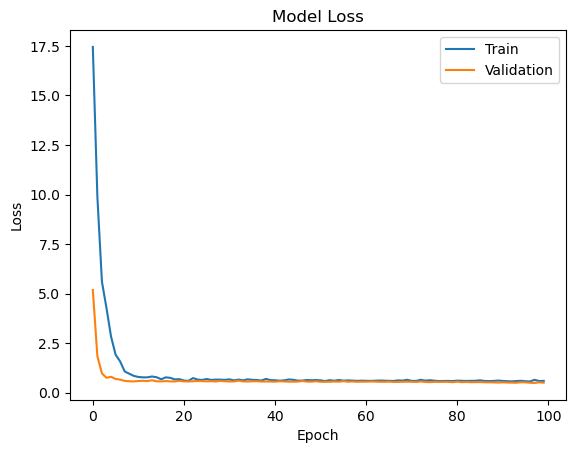

In [24]:
drop_loss = pd.DataFrame(model.history.history)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<AxesSubplot: >

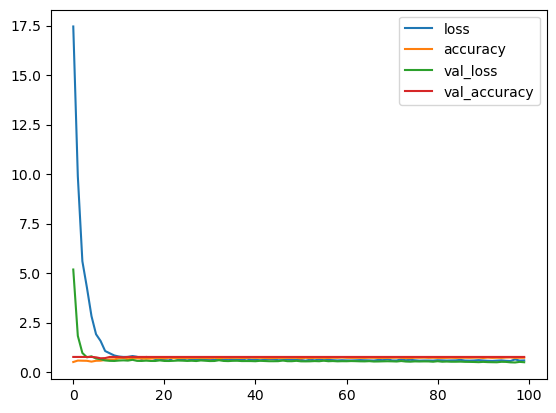

In [28]:
drop_loss.plot()

**Early Stopping + Drop Out Loss :**

In [25]:
# Model building
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dropout(0.2), # add dropout with rate 0.2
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2), # add dropout with rate 0.2
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dropout(0.2), # add dropout with rate 0.2
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ["accuracy"])

# Train the model
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),callbacks=[early],epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 29.4165 - accuracy: 0.6344 - val_loss: 3.6753 - val_accuracy: 0.7692
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 16.1734 - accuracy: 0.5303 - val_loss: 1.7749 - val_accuracy: 0.7692
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 11.2096 - accuracy: 0.6005 - val_loss: 3.2677 - val_accuracy: 0.7692
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 6.4067 - accuracy: 0.6053 - val_loss: 0.6097 - val_accuracy: 0.7692
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 4.1227 - accuracy: 0.5884 - val_loss: 0.5782 - val_accuracy: 0.7692
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 2.4309 - accuracy: 0.6126 - val_loss: 0.5536 - val_accuracy: 0.7692
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 1.4555 - accuracy: 0.6320 - val_loss: 0.6044 - val_accuracy: 0.7692
Epoch 8/1

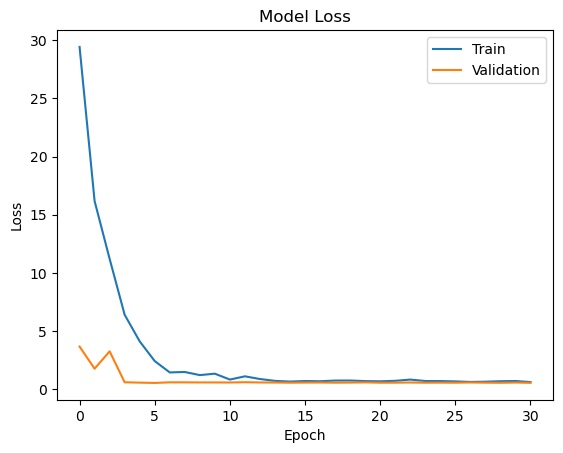

In [26]:
de_loss = pd.DataFrame(model.history.history)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<AxesSubplot: >

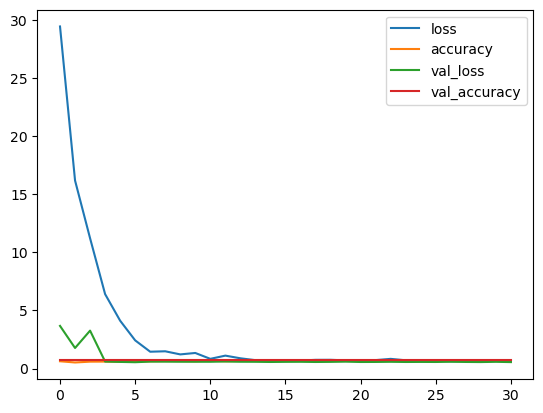

In [27]:
de_loss.plot()